<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df_malaria=pd.read_csv('malaria.csv')
df_malaria.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# no data means a row will have no  values.Like that how many rows are there is asked.isna() displays True when null values are there.
# and false where non null values are there.

In [6]:
na_data = df_malaria.isna()
na_data


,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,True,True,False,True,True,False,False,False,True,True,False,True,True
3,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
123,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
124,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
125,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


In [7]:
df = na_data.all(axis='columns') == True
df

0      False
1      False
2      False
3      False
4       True
       ...  
122    False
123    False
124    False
125    False
126    False
Length: 127, dtype: bool

In [8]:
#row indexes wheere all values are nan.indexes are in a list.isna() and isnull() both are used to detect nan or null values.
df.index[df==True].tolist()
#in row index 4,21,39,99 no data have been reported.

[4, 21, 39, 99]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
threshold = 0.6*df_malaria.shape[0]#columns which have values more than threshold values,those coluns have more than 60 percnt values missing.
threshold

76.2

In [10]:
null_values = df_malaria.isnull().sum()
null_values

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [11]:
col_list = list(null_values.index[null_values > threshold])#len df displays num of rows in df.

col_list

['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

In [23]:
# set the threshold value to filter the columns

# shape[0] returns number of rows for a dataframe

# isnull() returns the boolean output as to whether the value is 'null' or not
# sum() returns the total number of missing values

# print the list of columns that exceed the threshold


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# A country which has many null values,we will get doubt.That country should be considered first and we must record observations in that country again wheere malaria outbreak is detected.
#The above points are valid for only first 4 countries given in question.i m combining their cases and deaths to form a dataset.
df_obg = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]
df_obl = df_malaria[['Cases_Liberia', 'Deaths_Liberia']]
df_obsl = df_malaria[['Cases_SierraLeone', 'Deaths_SierraLeone']]
df_obnig = df_malaria[['Cases_Nigeria', 'Deaths_Nigeria']]
#df_obg





,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,NaN,NaN
4,NaN,NaN
...,...,...
122,103.0,66.0
123,86.0,62.0
124,86.0,60.0
125,86.0,59.0


In [15]:
# print the total number of missing values

print("Missing values for Guinea:"+ str(df_obg.isnull().sum().sum()))#one sum fn is for death and other sum fn for cases
print("Missing values for Liberia:"+ str(df_obl.isnull().sum().sum()))
print("Missing values for Sierra Leone:"+ str(df_obsl.isnull().sum().sum()))
print("Missing values for Nigeria:"+ str(df_obnig.isnull().sum().sum()))
#ANSWER: Among 4 countries,Nigeria has most number of missing values so nigeria must be considered first to record again for observations.

Missing values for Guinea:69
Missing values for Liberia:90
Missing values for Sierra Leone:80
Missing values for Nigeria:178


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

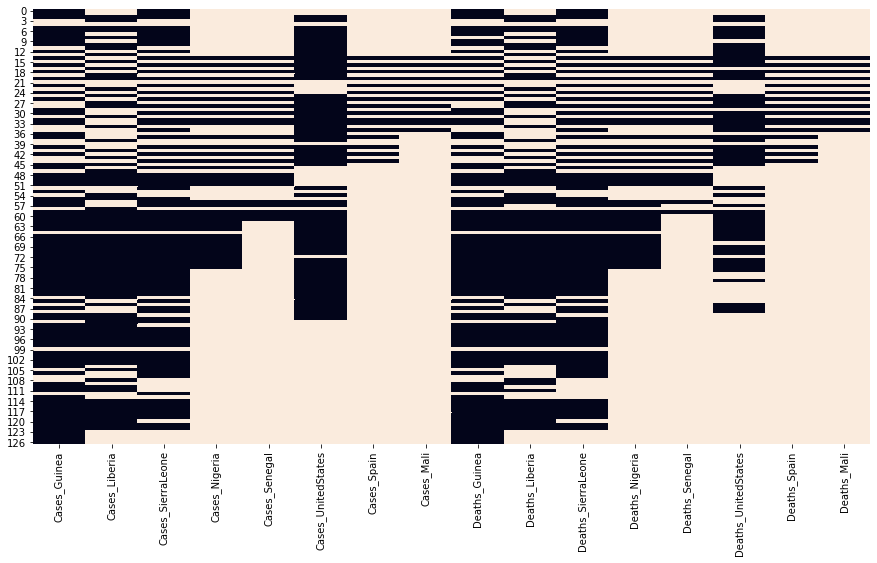

In [16]:
# set the figure size

plt.figure(figsize = (15,8))#cases and deaths in mali has many missinng values.not much data available from this country on malaria.
# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color bar or not
sns.heatmap(df_malaria.isnull(), cbar = False)
# display the plot
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
#keep all records or columns where more than 2 observations or values or elements  has been recorded.
# check the shape of the dataframe

print("Shape of the data before elimination:", df_malaria.shape)
# use the dropna() to remove the rows
df_malaria_updated = df_malaria.dropna(thresh = 3)
# check the shape of the dataframe
print("Shape of the data after elimination:", df_malaria_updated.shape)

Shape of the data before elimination: (127, 16)
Shape of the data after elimination: (110, 16)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# drop the columns with missing values more than 60%

# use the list 'col_list' from Q2 to drop the columns
df_malaria.drop(col_list, axis = 1, inplace = True)
# check the retained columns with corresponding missing values
df_malaria.isnull().sum()
                                                                      # unnecessary columns means meaningless,null value columns.


Cases_Guinea           34
Cases_Liberia          44
Cases_SierraLeone      40
Cases_UnitedStates     54
Deaths_Guinea          35
Deaths_Liberia         46
Deaths_SierraLeone     40
Deaths_UnitedStates    70
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values before treatment: 44


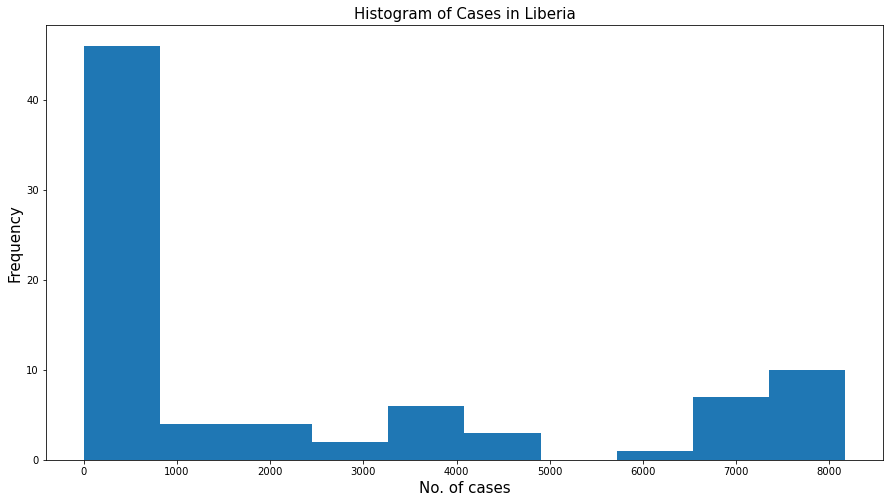

In [24]:
# check the number of null values in the column 'Cases_Liberia'

print("Null values before treatment:", df_malaria['Cases_Liberia'].isnull().sum())#right skewed plot below
# set the figure size
plt.figure(figsize = (15,8))
# plot the histogram
plt.hist(x = df_malaria['Cases_Liberia'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Cases in Liberia', fontsize = 15)
plt.xlabel('No. of cases', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()

In [25]:
# imputing with median value

df_malaria['Cases_Liberia'] = df_malaria['Cases_Liberia'].fillna(df_malaria['Cases_Liberia'].median())
# check the null values after imputation
print("Null values after treatment:", df_malaria['Cases_Liberia'].isnull().sum())#null values replaced by median

Null values after treatment: 0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values before treatment: 54


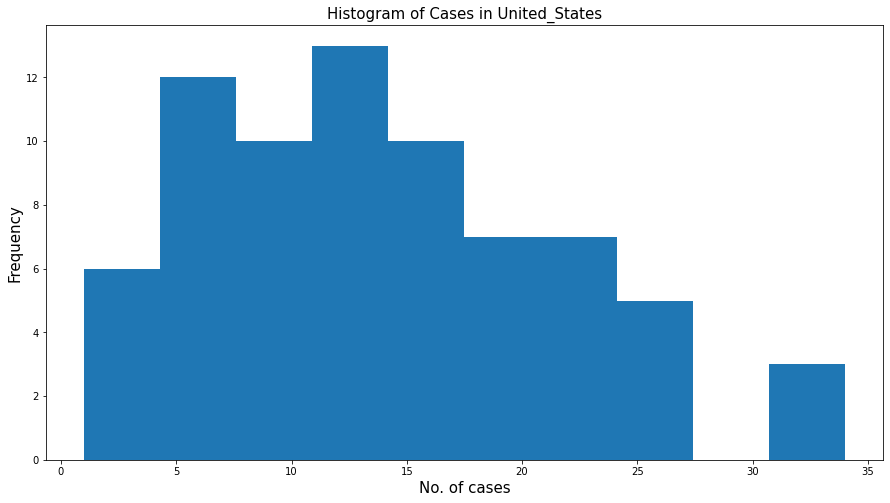

In [27]:
# check the number of null values in the column 'United_States'

print("Null values before treatment:", df_malaria['Cases_UnitedStates'].isnull().sum())#right skewed plot below
# set the figure size
plt.figure(figsize = (15,8))
# plot the histogram
plt.hist(x = df_malaria['Cases_UnitedStates'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Cases in United_States', fontsize = 15)
plt.xlabel('No. of cases', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()

9. How should the missing values from the observations recorded in 'Guinea' be dealt with?

Null values:
 Cases_Guinea     34
Deaths_Guinea    35
dtype: int64


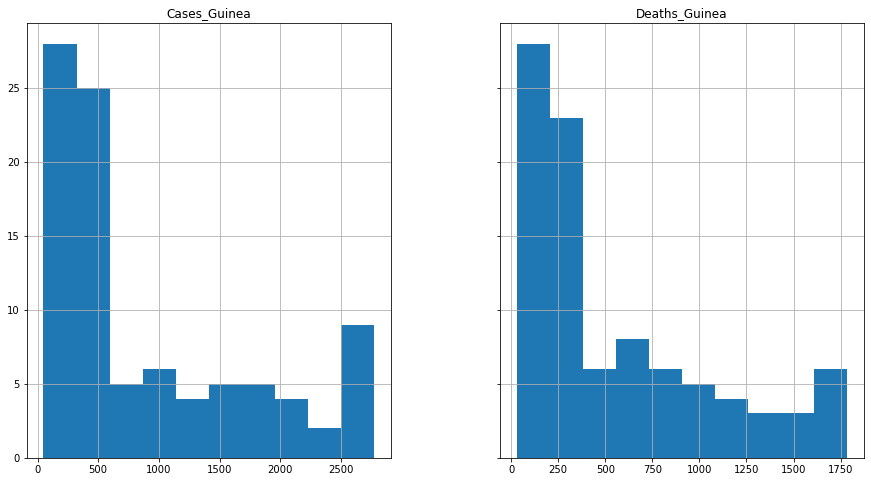

In [29]:
# combine the recorded observations for mentioned country

df_observations = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]

# missing values in the variables

print('Null values:\n', df_observations.isnull().sum())
# plot histogram
# 'sharey' shares the y-axis for all subplots
df_observations.hist(figsize = (15,8), sharey = True)
# display the plot
plt.show()

In [32]:
# imputing with median value

for col in df_observations:
    df_observations[col] = df_observations[col].fillna(df_observations[col].median())
# check the missing values
print("Null values after treatment: \n", df_observations.isnull().sum())#skewed means go for median and symmetrical means go for mean.

Null values after treatment: 
 Cases_Guinea     0
Deaths_Guinea    0
dtype: int64


<ipython-input-32-c17885604be6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_observations[col] = df_observations[col].fillna(df_observations[col].median())


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

In [3]:
df_house=pd.read_csv('house.csv')
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

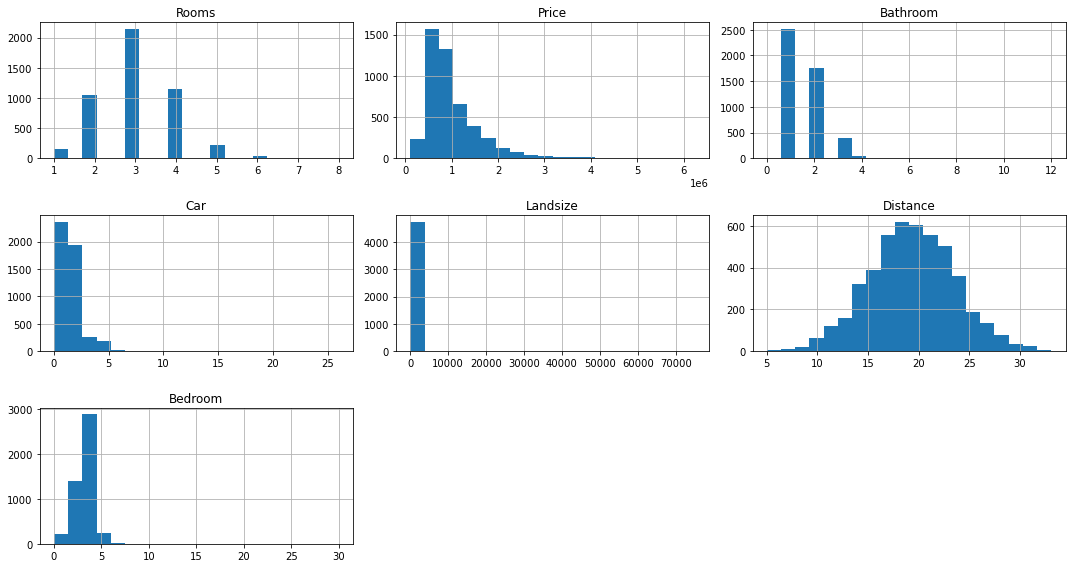

In [7]:
# plot histogram of all numeric variables

# set the number of bins to 20
# set the figure size using 'figsize'
df_house.hist(bins = 20, figsize = (15,8))
# adjust the subplots
plt.tight_layout()
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Car'>

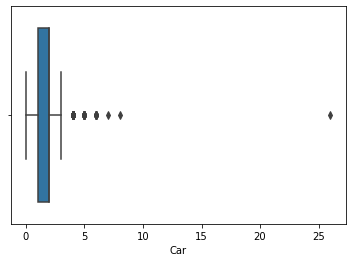

In [8]:
sns.boxplot(x=df_house['Car'])#Outlier values are after 4 value in car axis of boxplot.Outlier values are dots in boxplot after max value.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
#House type h has most outliers followed by type u and type t.

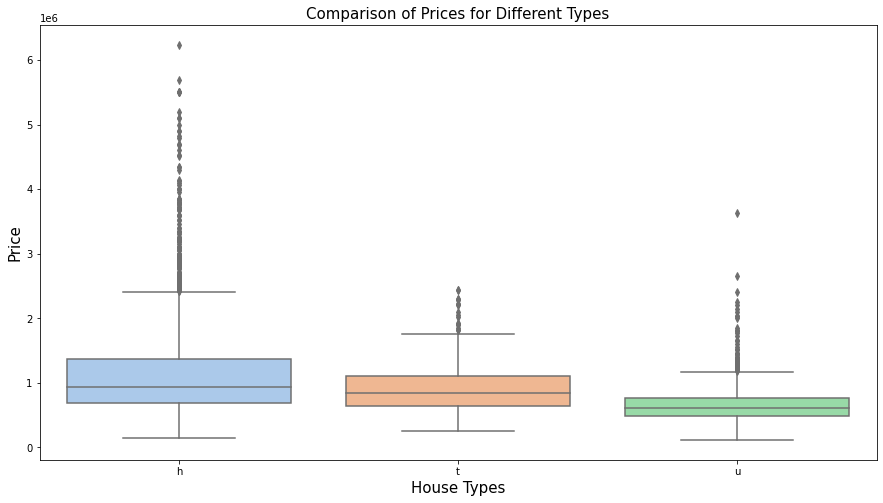

In [10]:
# set the figure size

plt.figure(figsize=(15,8))
# plot a boxplot to compare the prices of different house types
# 'palette' assigns colors to the plot
sns.boxplot(x = df_house['Type'], y = df_house['Price'] , palette='pastel')
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of Prices for Different Types', fontsize = 15)
plt.xlabel('House Types', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
# display the plot
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

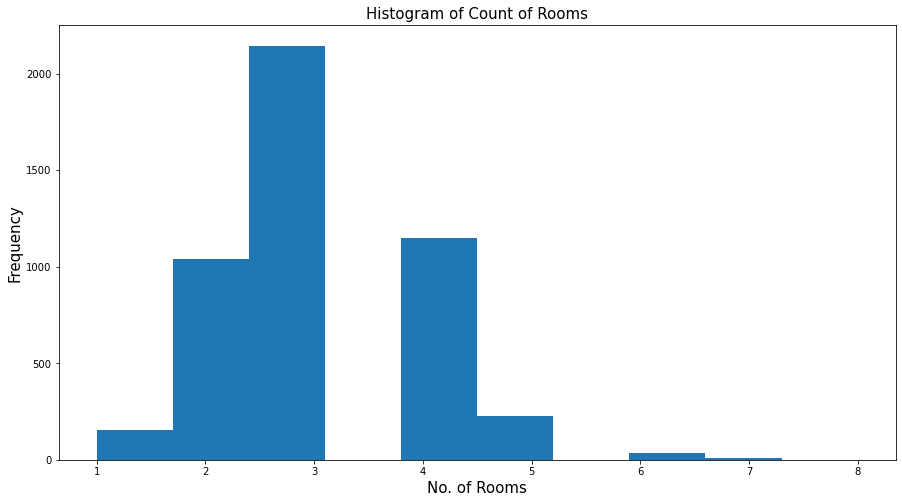

In [11]:
# set the figure size

plt.figure(figsize = (15,8))
# plot histogram of 'Rooms' to visualize the outliers
plt.hist(x = df_house['Rooms'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Count of Rooms', fontsize = 15)
plt.xlabel('No. of Rooms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()

In [13]:
#value 6 and 7 are the extree values as it is completely disconnected from the graph.method 2below
outliers=[]

def detect_outlier(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for y in data:
        z_score= (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
# call the function to detect outliers
outlier_pt = detect_outlier(df_house.Rooms)
print("Outliers for 'Rooms' variable:\n" + str(outlier_pt))


Outliers for 'Rooms' variable:
[7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

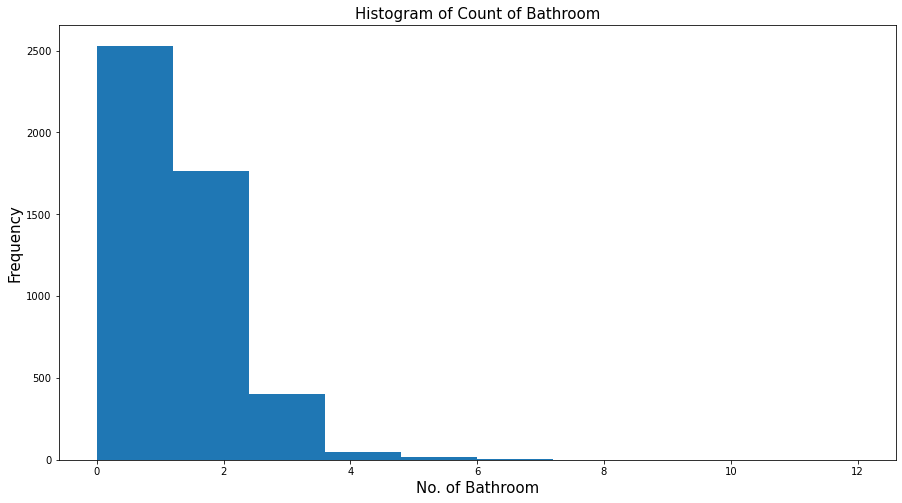

In [14]:
# set the figure size

plt.figure(figsize = (15,8))
# plot histogram of 'Rooms' to visualize the outliers
plt.hist(x = df_house['Bathroom'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Count of Bathroom', fontsize = 15)
plt.xlabel('No. of Bathroom', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# display the plot
plt.show()#Extreme value is above 4 no: of bathroom.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<ipython-input-18-0dfe9bfffd8b>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s ='Extreme Point', xy=(1.02, 29.9), xytext=(1.1, 29.72), arrowprops=dict(facecolor='blue', arrowstyle = 'simple'))


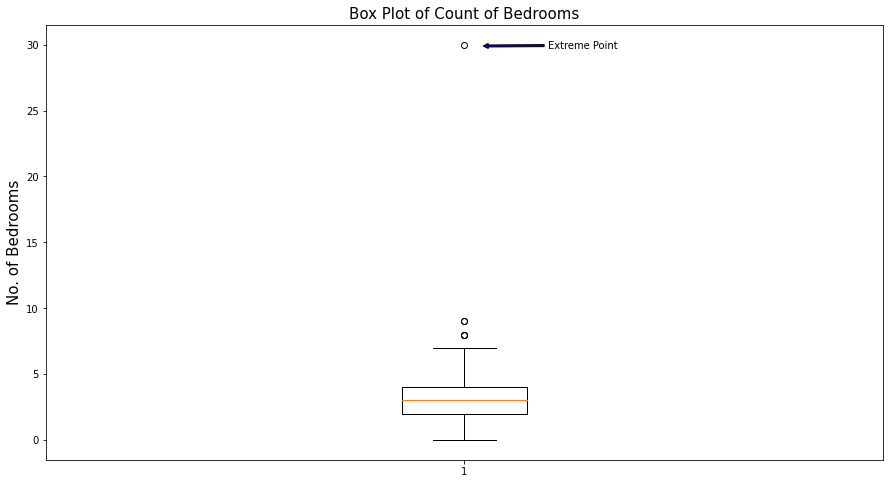

In [18]:
# set the figure size

plt.figure(figsize = (15,8))
# histogram of 'Bedroom' to visualize the extreme outliers
plt.boxplot(x = df_house['Bedroom'])
# use 'annonate' to draw an arrow between points xy and xytext
# 's' represents the text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Extreme Point', xy=(1.02, 29.9), xytext=(1.1, 29.72), arrowprops=dict(facecolor='blue', arrowstyle = 'simple'))
# assign plot and axes labels
#set text size using 'fontsize'
plt.title('Box Plot of Count of Bedrooms', fontsize = 15)
plt.ylabel('No. of Bedrooms', fontsize = 15)
# display the plot
plt.show()

In [16]:
 #calculate the first quartile

Q1 = df_house['Bedroom'].quantile(0.25)
#calculate the third quartile
Q3 = df_house['Bedroom'].quantile(0.75)
# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
# extract the observation
df_house[df_house['Bedroom'] > Q3 + 3*IQR]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30


In [4]:
df_house

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

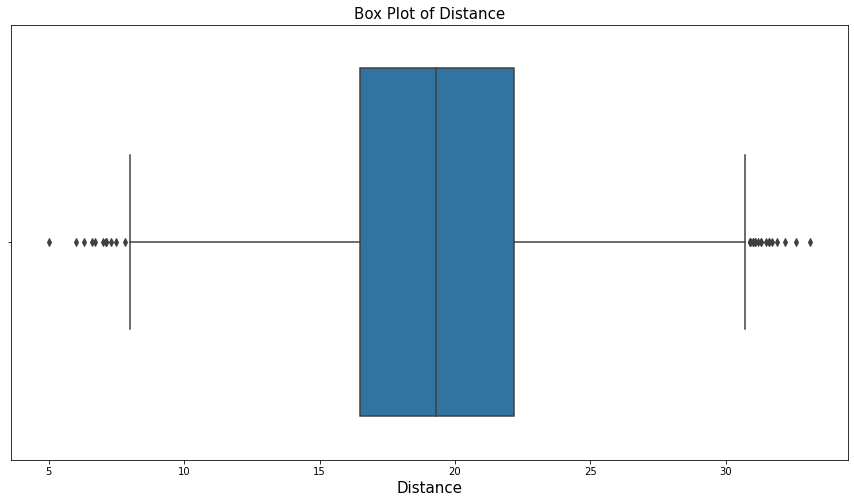

In [19]:
# set the figure size

plt.figure(figsize = (15,8))
# box plot to check the presence of outliers
sns.boxplot(x = df_house['Distance'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Box Plot of Distance', fontsize = 15)
plt.xlabel('Distance', fontsize = 15)
# display the plot
plt.show()

In [21]:
#check the average distance before removing the outliers

print('Original Average distance:', df_house['Distance'].mean())
# calculate the first quartile
Q1 = df_house['Distance'].quantile(0.25)
#calculate the third quartile
Q3 = df_house['Distance'].quantile(0.75)
# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
# remove the outliers from the variable
df_house_updated = df_house[~((df_house['Distance'] < (Q1 - 1.5 * IQR)) | (df_house['Distance'] > (Q3 + 1.5 * IQR)))]
# check the average distance after removing the outliers
print('Updated Average distance:', df_house_updated['Distance'].mean())
#AFTER neglecting the outliers,there is no significant difference in average distance.

Original Average distance: 19.32834662190515
Updated Average distance: 19.311425554382247


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

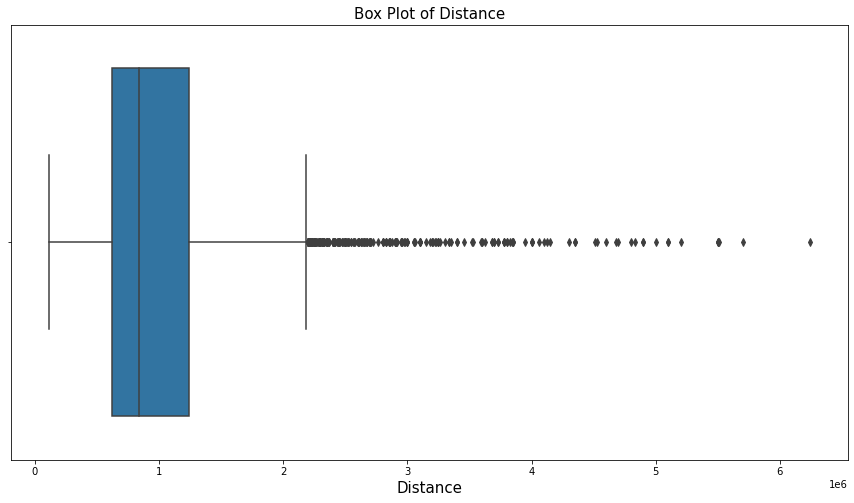

In [23]:
# set the figure size

plt.figure(figsize = (15,8))
# box plot to check the presence of outliers
sns.boxplot(x = df_house['Price'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Box Plot of Distance', fontsize = 15)
plt.xlabel('Distance', fontsize = 15)
# display the plot
plt.show()

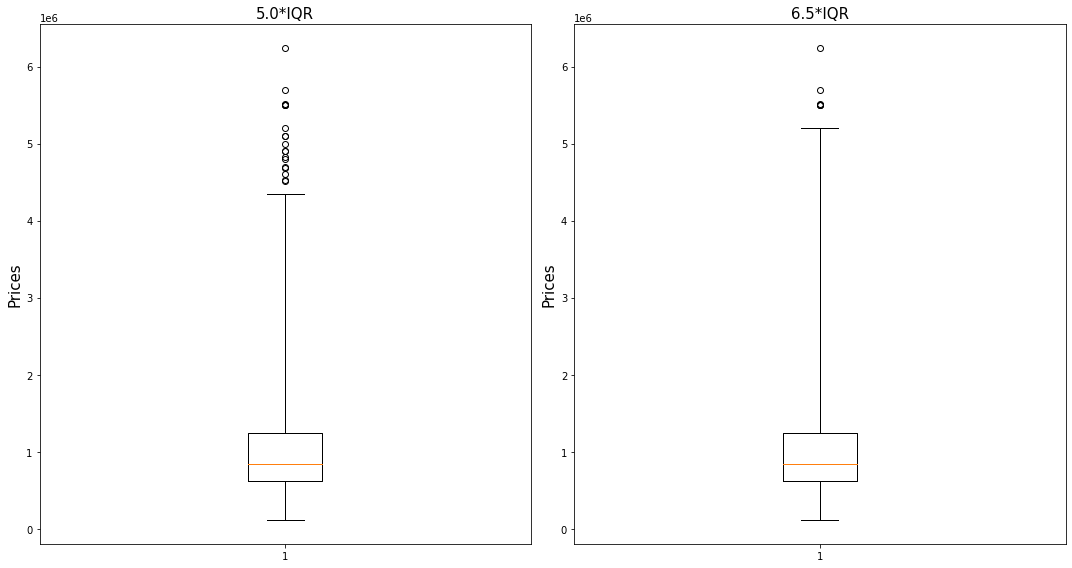

In [24]:
# set the figure size

plt.figure(figsize = (15,8))
# plot the boxplots with different whisker range
# create the subplots of boxplot
# 'whis' determines the reach of the whisker
plt.subplot(1,2,1)
plt.boxplot(x = df_house['Price'], whis = 5.0)
plt.title('5.0*IQR', fontsize = 15)
plt.ylabel('Prices', fontsize = 15)
plt.subplot(1,2,2)
plt.boxplot(x = df_house['Price'], whis = 6.5)
plt.title('6.5*IQR', fontsize = 15)
plt.ylabel('Prices', fontsize = 15)
# adjust the subplots
plt.tight_layout()
# display the plot
plt.show()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df_house['Distance'].describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [27]:
# assign a name to the column

dist = df_house['Distance']
# define a function to create new levels
# use 'if' statement to pass the conditions
def new_feat(dist):
    if (dist >= 5.0) & (dist < 15.0):
        return 'walking_distance'
    if (dist >= 15.0) & (dist < 25.0):
        return 'close_by'
    if (dist > 25.0):
        return 'far_away'
# apply the function to create a new column
df_house['Distance_level']= df_house['Distance'].apply(new_feat)


In [28]:
df_house.head(5)                                                            #extreme values are called outliers.

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_level
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,far_away
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,close_by
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,close_by
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,close_by
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,close_by


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

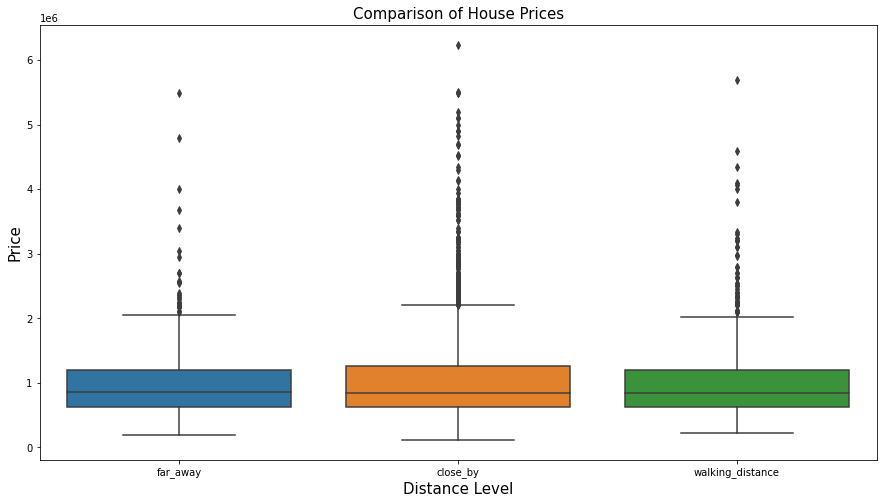

In [29]:
# set the figure size

plt.figure(figsize = (15,8))
# plot a boxplot to compare the house prices
# pass distance levels to the parameter, 'hue'
sns.boxplot(x = df_house['Distance_level'], y = df_house['Price'])
# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of House Prices', fontsize = 15)
plt.xlabel('Distance Level', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
# display the plot
plt.show()
#When the distance level is close by,it has most number of outliers.

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# split the variable into two subsets

# import 'train_test_split' from sklearn
from sklearn.model_selection import train_test_split
# set the 'random_state' to generate the same data for every implementation of the code
# 'test_size' returns the 20% of the data in one dataset and 80% in another
price_train, price_test = train_test_split(df_house['Price'], test_size = 0.20, random_state = 0)
# print the shape of train and test sets
print("price_train",price_train.shape)
print("price_test",price_test.shape)

price_train (3812,)
price_test (954,)


In [31]:
df_house['Price'].mean()

1019577.0480486781

In [37]:
price_train.mean()

1020523.7993179433

In [38]:
price_test.mean()

1015794.0125786164